# System Model V3 - Debt Market Model - Recommended Parameters with Monte Carlo

The purpose of this notebook is to simulate a monte carlo run of the full CDP and APT system model, using a stochastic Ethereum price and liquidity demand process as a driver.


We want to run a basic simuluation in order to serve as a sanity check. We want the simulation to have no liquidity shocks, the controller on, arbitrageur considers the liquidation ratio, and target price scaling. The market price presented should be stable and should reflect the movement and volatility of the realized sample path of the ETH price.

In order to test this, configure the following experiment [recommended_params_mc.py](https://github.com/BlockScience/reflexer/blob/experiment-analysis/experiments/system_model_v3/recommended_params_mc.py). We use the recommended params with a sweep of controller on/off. Run run this simulation, we create a directory in the ```experiments/system_model_v3``` called ```recommended_params_mc/```,and add a ```logs/``` directory inside of it.

Assuming our we have all of the requirements required (run requirements.txt from the ```reflexer/``` root directory to be sure) and assuming our terminal is in the root directory, we run the follow to run the simulation:

```bash
python -m experiments.system_model_v3.recommended_params_mc
```
And our simulation will run. The resulting [run log](https://github.com/BlockScience/reflexer/blob/experiment-analysis/experiments/system_model_v3/recommended_params_mc/experiment_run_log.md)
 can be found in the ```experiments/system_model_v3/recommended_params_mc/``` directory, along with the simulation results stored as ```experiment_results.hdf5```


Below we will import and examine the simulation results.


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## Import simulation run data


In [2]:
os.getcwd()

'/home/aclarkdata/repos/reflexer/notebooks/analysis'

In [3]:
os.chdir('../../')
os.getcwd()

'/home/aclarkdata/repos/reflexer'

In [4]:
experiment_results = 'experiments/system_model_v3/recommended_params_mc/experiment_results.hdf5'
experiment_results_keys = []
with pd.HDFStore(experiment_results) as store:
    experiment_results_keys = list(filter(lambda x: "results" in x, store.keys()))
    exceptions_keys = list(filter(lambda x: "exceptions" in x, store.keys()))

In [5]:
# A list of all experiment result keys
experiment_results_keys

['/results_2021-03-09T14:11:28.299554']

In [6]:
# Copy a results_ key from the above keys to select the experiment
experiment_results_key = experiment_results_keys[-1]#'results_2021-02-09T18:46:33.073363' # Or select last result: experiment_results_keys[-1]
experiment_timestamp = experiment_results_key.strip('results_')
exceptions_key = 'exceptions_' + experiment_timestamp
experiment_timestamp

'/results_2021-03-09T14:11:28.299554'

In [7]:
df_raw = pd.read_hdf(experiment_results, experiment_results_key)
df_raw.tail()

,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,RAI_balance,ETH_balance,UNI_supply,uniswap_oracle,simulation,subset,run,substep,timestep,events
43790,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,31514400,2017-12-31 18:00:00,0,268.277872,0,0.0,...,7.441456e+06,159564.624592,10000000.0,None,0,0,5,18,8754,NaN
43791,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,31518000,2017-12-31 19:00:00,0,268.235307,0,0.0,...,7.428443e+06,159844.999871,10000000.0,None,0,0,5,18,8755,NaN
43792,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,31521600,2017-12-31 20:00:00,0,268.398035,0,0.0,...,7.429398e+06,159824.501998,10000000.0,None,0,0,5,18,8756,NaN
43793,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,31525200,2017-12-31 21:00:00,0,268.450773,0,0.0,...,7.435884e+06,159685.522675,10000000.0,<models.system_model_v3.model.parts.uniswap_or...,0,0,5,18,8757,NaN
43794,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,31528800,2017-12-31 22:00:00,0,269.628730,0,0.0,...,7.439324e+06,159611.896454,10000000.0,<models.system_model_v3.model.parts.uniswap_or...,0,0,5,18,8758,NaN


## Post process

In [8]:
from experiments.system_model_v3.post_process import post_process_results
from experiments.system_model_v3.recommended_params_mc import params, SIMULATION_TIMESTEPS

In [9]:
df = post_process_results(df_raw, params, set_params=['ki', 'kp', 'liquidation_ratio'])
df

Adding new columns
0.09942436218261719
Getting parameter sweep
0.0998225212097168
Assigning parameters to subsets
5.907243967056274
Creating target_price_scaled
5.917158126831055


,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,run,substep,timestep,events,eth_collateral_value,collateralization_ratio,ki,kp,liquidation_ratio,target_price_scaled
0,{},{},{},0,0,2017-01-01 00:00:00,0,294.069151,1,1.0000,...,1,0,0,NaN,4.553000e+07,1.450000,-5.000000e-09,2.000000e-07,1.45,4.553000
1,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,3600,2017-01-01 01:00:00,0,291.208252,0,0.5000,...,1,18,1,NaN,4.508705e+07,1.435893,-5.000000e-09,2.000000e-07,1.45,3.140000
2,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,7200,2017-01-01 02:00:00,0,292.287792,0,0.2500,...,1,18,2,NaN,4.525420e+07,1.455375,-5.000000e-09,2.000000e-07,1.45,3.140000
3,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,10800,2017-01-01 03:00:00,0,289.343698,0,0.1250,...,1,18,3,NaN,4.479837e+07,1.435395,-5.000000e-09,2.000000e-07,1.45,3.140000
4,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,14400,2017-01-01 04:00:00,0,286.827771,0,0.0625,...,1,18,4,NaN,4.440884e+07,1.437392,-5.000000e-09,2.000000e-07,1.45,3.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43790,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,31514400,2017-12-31 18:00:00,0,268.277872,0,0.0000,...,5,18,8754,NaN,4.153680e+07,1.447464,-5.000000e-09,2.000000e-07,1.45,5.591589
43791,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,31518000,2017-12-31 19:00:00,0,268.235307,0,0.0000,...,5,18,8755,NaN,4.153021e+07,1.450187,-5.000000e-09,2.000000e-07,1.45,5.589983
43792,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,31521600,2017-12-31 20:00:00,0,268.398035,0,0.0000,...,5,18,8756,NaN,4.155540e+07,1.451266,-5.000000e-09,2.000000e-07,1.45,5.588496
43793,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,31525200,2017-12-31 21:00:00,0,268.450773,0,0.0000,...,5,18,8757,NaN,4.156357e+07,1.450671,-5.000000e-09,2.000000e-07,1.45,5.587009


# Simulation Analysis

In [10]:
df.substep.unique()

array([ 0, 18])

In [11]:
df.run.unique()

array([1, 2, 3, 4, 5])

In [12]:
df.subset.unique()

array([0])

In [13]:
df.columns

Index(['cdp_metrics', 'optimal_values', 'sim_metrics', 'timedelta',
       'cumulative_time', 'timestamp', 'blockheight', 'eth_price',
       'liquidity_demand', 'liquidity_demand_mean', 'cdps', 'eth_collateral',
       'eth_locked', 'eth_freed', 'eth_bitten', 'principal_debt', 'rai_drawn',
       'rai_wiped', 'rai_bitten', 'accrued_interest', 'interest_dripped',
       'interest_wiped', 'interest_bitten', 'w_1', 'w_2', 'w_3',
       'system_revenue', 'stability_fee', 'market_price', 'market_price_twap',
       'target_price', 'target_rate', 'eth_return', 'eth_gross_return',
       'expected_market_price', 'expected_debt_price', 'error_star',
       'error_star_integral', 'market_slippage', 'RAI_balance', 'ETH_balance',
       'UNI_supply', 'uniswap_oracle', 'simulation', 'subset', 'run',
       'substep', 'timestep', 'events', 'eth_collateral_value',
       'collateralization_ratio', 'ki', 'kp', 'liquidation_ratio',
       'target_price_scaled'],
      dtype='object')

In [14]:
# remove the first timestep
df = df.iloc[1:]

In [15]:
# calculate errors
df['error'] = df['target_price_scaled'] - df['market_price']
df['error_integral'] = df['error'].cumsum()

<ipython-input-15-d9a25b4143fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['error'] = df['target_price_scaled'] - df['market_price']
<ipython-input-15-d9a25b4143fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['error_integral'] = df['error'].cumsum()


In [16]:
def plot_fan_chart(df,aggregate_dimension,x, y,lx=False,ly=False,density_hack=True):
    def q10(x):
        return x.quantile(0.1)

    def q20(x):
        return x.quantile(0.2)

    def q30(x):
        return x.quantile(0.3)

    def q40(x):
        return x.quantile(0.4)

    def q60(x):
        return x.quantile(0.6)

    def q70(x):
        return x.quantile(0.7)

    def q80(x):
        return x.quantile(0.8)

    def q90(x):
        return x.quantile(0.9)

    run_count = max(df.run)

    agg_metrics = [q10, q20, q30, q40, 'median', q60, q70, q80, q90]
    agg_df = df.groupby(aggregate_dimension).agg({y: agg_metrics})
    agg_metrics = agg_df.columns.levels[1].values
    agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
    plt.figure(figsize=(10,6))

    df = agg_df.reset_index()
    lines = plt.plot(df[x], df[f'{y}_median'])
    color = lines[0].get_color()
    if density_hack:
        avg_iqr = []
        for i in range(len(agg_metrics)-1):
            m = (agg_metrics[i], agg_metrics[i+1])
            iqr = df[f'{y}_{m[1]}'] - df[f'{y}_{m[0]}']
            avg_iqr.append(iqr.sum())
        inv_avg_iqr = [1/i for i in avg_iqr]
        norm_avg_iqr = [i/max(inv_avg_iqr) for i in inv_avg_iqr]
        i = 0
        while i<len(agg_metrics)-1:
            m = (agg_metrics[i], agg_metrics[i+1])
            plt.fill_between(df[x], df[f'{y}_{m[0]}'], df[f'{y}_{m[1]}'], alpha=0.8*norm_avg_iqr[i], facecolor=color, edgecolor=None)
            i += 1
    else:
        i = 0
        while i<len(agg_metrics)/2:
            m = (agg_metrics[i], agg_metrics[-1-i])
            plt.fill_between(df[x], df[f'{y}_{m[0]}'], df[f'{y}_{m[1]}'], alpha=0.3, color=color)
            i += 1

    plt.xlabel(x)
    plt.ylabel(y)
    title_text = 'Distribution of ' + y + ' over all of ' + str(run_count) + ' Monte Carlo runs'
    plt.title(title_text)
    plt.legend(['Median', 'Interquantile Ranges'])
    if lx:
        plt.xscale('log')
    if ly:
        plt.yscale('log')

### Generate key plots for analysis

We use an interquantile range fan chart with a density hack to help understand the true trends of the simulation runs.

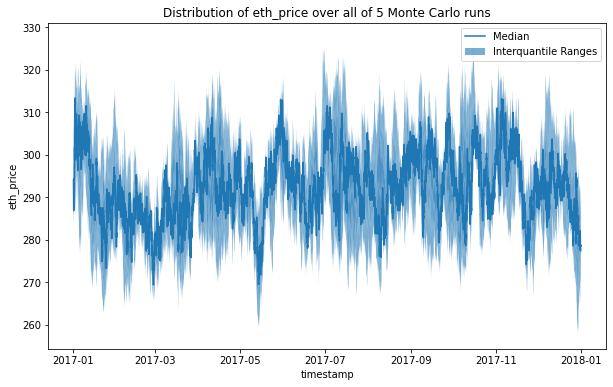

In [17]:
plot_fan_chart(df,'timestamp','timestamp', 'eth_price',lx=False,ly=False,density_hack=True)

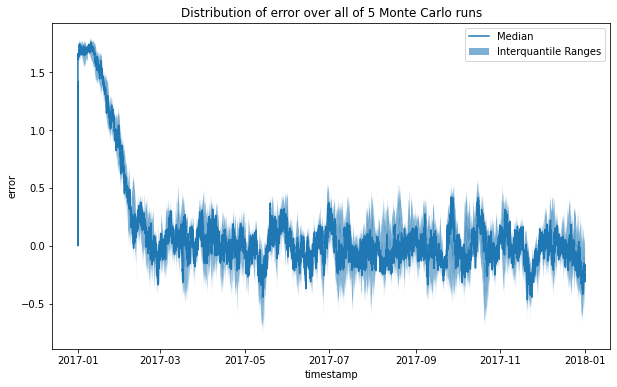

In [18]:
plot_fan_chart(df,'timestamp','timestamp', 'error',lx=False,ly=False,density_hack=True)

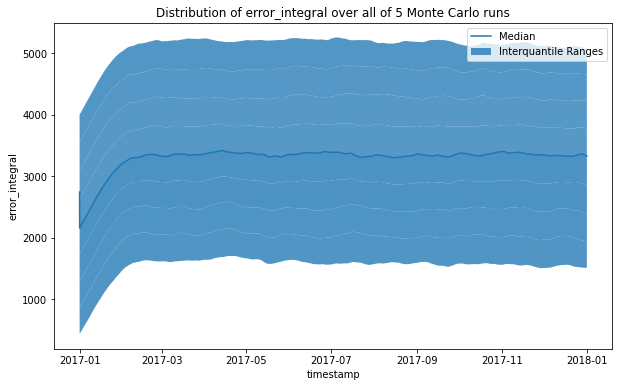

In [19]:
plot_fan_chart(df,'timestamp','timestamp', 'error_integral',lx=False,ly=False,density_hack=True)

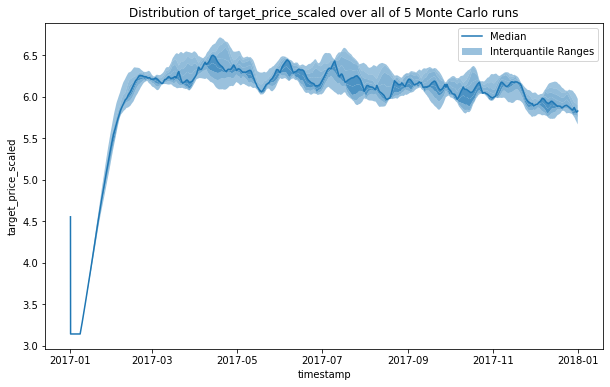

In [20]:
# Redemption Price in Rai
plot_fan_chart(df,'timestamp','timestamp', 'target_price_scaled',lx=False,ly=False,density_hack=True)

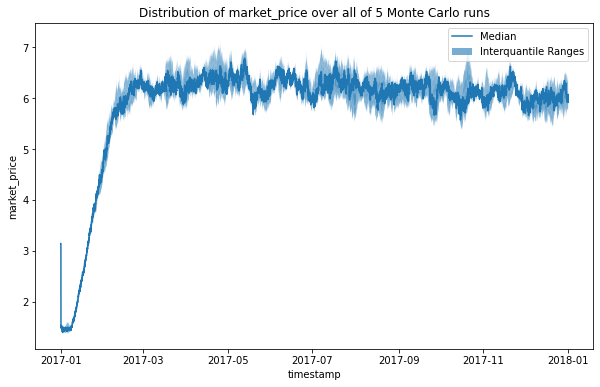

In [21]:
# Market Price in Rai
plot_fan_chart(df,'timestamp','timestamp', 'market_price',lx=False,ly=False,density_hack=True)

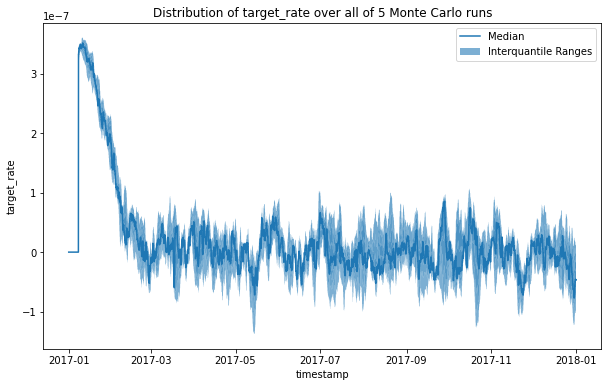

In [22]:
# Redemption Rate
plot_fan_chart(df,'timestamp','timestamp', 'target_rate',lx=False,ly=False,density_hack=True)

## Conclusion

System simulation appears to be as expected across a series of 5 monte carlo runs.